<a href="https://colab.research.google.com/github/muneeb706/machine-learning/blob/main/ridge_lasso_regression_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [109]:
import os
import sys

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

Loading the dataset.

In [40]:
house_scale_data = pd.read_csv('./sample_data/house_scale.txt', sep=" ", header=None)
house_scale_data.columns = ["target", "column-1", "column-2", "column-3", "column-4", 
                            "column-5", "column-6", "column-7", "column-8", "column-9", 
                            "column-10", "column-11", "column-12", "column-13", "column-14"]
# removing junk column
del house_scale_data["column-14"]
print(house_scale_data.head())

   target     column-1 column-2  ...     column-11    column-12     column-13
0    24.0         1:-1  2:-0.64  ...  11:-0.425532         12:1   13:-0.82064
1    21.6  1:-0.999528     2:-1  ...   11:0.106383         12:1   13:-0.59106
2    34.7  1:-0.999529     2:-1  ...   11:0.106383  12:0.979475  13:-0.873068
3    33.4  1:-0.999414     2:-1  ...   11:0.297872  12:0.988552  13:-0.933223
4    36.2   1:-0.99859     2:-1  ...   11:0.297872         12:1  13:-0.801325

[5 rows x 14 columns]


Preprocessing data values.

In [43]:
# removing garbage from data values and converting the values to float
house_scale_processed = pd.DataFrame()
house_scale_processed["target"] = house_scale_data["target"]
house_scale_processed["column-1"] = house_scale_data["column-1"].str.replace('1:', '').astype(float)
house_scale_processed["column-2"] = house_scale_data["column-2"].str.replace('2:', '').astype(float)
house_scale_processed["column-3"] = house_scale_data["column-3"].str.replace('3:', '').astype(float)
house_scale_processed["column-4"] = house_scale_data["column-4"].str.replace('4:', '').astype(float)
house_scale_processed["column-5"] = house_scale_data["column-5"].str.replace('5:', '').astype(float)
house_scale_processed["column-6"] = house_scale_data["column-6"].str.replace('6:', '').astype(float)
house_scale_processed["column-7"] = house_scale_data["column-7"].str.replace('7:', '').astype(float)
house_scale_processed["column-8"] = house_scale_data["column-8"].str.replace('8:', '').astype(float)
house_scale_processed["column-9"] = house_scale_data["column-9"].str.replace('9:', '').astype(float)
house_scale_processed["column-10"] = house_scale_data["column-10"].str.replace('10:', '').astype(float)
house_scale_processed["column-11"] = house_scale_data["column-11"].str.replace('11:', '').astype(float)
house_scale_processed["column-12"] = house_scale_data["column-12"].str.replace('12:', '').astype(float)
house_scale_processed["column-13"] = house_scale_data["column-13"].str.replace('13:', '').astype(float)

print(house_scale_processed.head())


   target  column-1  column-2  ...  column-11  column-12  column-13
0    24.0 -1.000000     -0.64  ...  -0.425532   1.000000  -0.820640
1    21.6 -0.999528     -1.00  ...   0.106383   1.000000  -0.591060
2    34.7 -0.999529     -1.00  ...   0.106383   0.979475  -0.873068
3    33.4 -0.999414     -1.00  ...   0.297872   0.988552  -0.933223
4    36.2 -0.998590     -1.00  ...   0.297872   1.000000  -0.801325

[5 rows x 14 columns]


# Q-1: Solution of Ridge Regression and Lasso: Set the value of the regularization parameter alpha = 1, compute the optimal solution for ridge regression and lasso. Report the optimal solutions for both ridge regression and lasso.

Separating features from target variables.

In [54]:
house_scale_X, house_scale_y = x = house_scale_processed.iloc[:, 1:], house_scale_processed.iloc[:, 0]

print("Feature vector: ")
print(house_scale_X.head())
print("\nTaget vector: ")
print(house_scale_y.head())

Feature vector: 
   column-1  column-2  column-3  ...  column-11  column-12  column-13
0 -1.000000     -0.64 -0.864370  ...  -0.425532   1.000000  -0.820640
1 -0.999528     -1.00 -0.515396  ...   0.106383   1.000000  -0.591060
2 -0.999529     -1.00 -0.515396  ...   0.106383   0.979475  -0.873068
3 -0.999414     -1.00 -0.873900  ...   0.297872   0.988552  -0.933223
4 -0.998590     -1.00 -0.873900  ...   0.297872   1.000000  -0.801325

[5 rows x 13 columns]

Taget vector: 
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64


Splitting data into training and testing dataset.

In [56]:
house_scale_X_train, house_scale_X_test, house_scale_Y_train, house_scale_Y_test = train_test_split(house_scale_X, house_scale_y, test_size = 0.30, random_state = 5)

### Ridge Regression with alpha = 1

In [77]:
n = len(house_scale_X_train)
alpha=1
alpha_val = alpha * 2 * n
ridge_model = Ridge(alpha=alpha_val)
ridge_model.fit(house_scale_X_train, house_scale_Y_train)
ridge_model_Y_pred_train = ridge_model.predict(house_scale_X_train)
ridge_model_Y_pred = ridge_model.predict(house_scale_X_test)

print('Intercept: ',ridge_model.intercept_)
print('Coefficients: \n',ridge_model.coef_)

Intercept:  22.174977821919907
Coefficients: 
 [-0.20506235  0.47128851 -0.59997091  0.297699   -0.48415313  0.651689
 -0.51514572  0.12161011 -0.58539969 -0.68047074 -0.75066957  0.39575163
 -0.98197053]


### Lasso Regression with alpha = 1

In [78]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(house_scale_X_train,house_scale_Y_train)
lasso_model_Y_pred_train = lasso_model.predict(house_scale_X_train)
lasso_model_Y_pred = lasso_model.predict(house_scale_X_test)

print('Intercept: ',lasso_model.intercept_)
print('Coefficients: \n',lasso_model.coef_)

Intercept:  19.131469178221888
Coefficients: 
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.         -2.24584583  0.
 -9.93954317]


# Q-2: Training and testing error with different values of alpha: (i) Take the first 400 examples as training data and remaining 106 examples as testing data. (ii) For each value of alpha in [0, 0.001, 0.01,0.1, 1, 10, 100], run the ridge regression and lasso to obtain a model (w) and then compute the root mean square error on both the training and the testing data of the obtained model.(iii) Plot the error curves for root mean square error on both the training data and the testing data vs different values of alpha. You need to show the curves, and discuss your observations of the error curves, and report the best value of lambda and the corresponding testing error.

Splitting data into 400 training examples and 106 testing examples.

In [80]:
house_scale_X_train, house_scale_X_test, house_scale_Y_train, house_scale_Y_test = train_test_split(house_scale_X, house_scale_y, train_size=400, test_size = 106, random_state = 5)

Alpha values.

In [79]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]

### RMSE of Ridge Regression Model w.r.t different values of alpha.

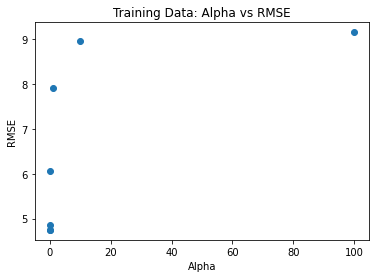



Alpha:  [0, 0.001, 0.01, 0.1, 1, 10, 100]
RMSE:  [4.7468137709887674, 4.749535782890467, 4.867372757414787, 6.068531374366747, 7.906700686689975, 8.950883076824168, 9.150268582931327]


Training Data, best lambda:  0
Training Data, corresponding training error:  4.7468137709887674




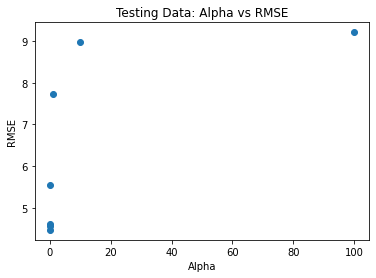



Alpha:  [0, 0.001, 0.01, 0.1, 1, 10, 100]
RMSE:  [4.607465984735515, 4.561393516265717, 4.467053404216041, 5.540371291150933, 7.733114475466447, 8.981938764685452, 9.213590415363146]


Testing Data, best lambda:  0.01
Testing Data, corresponding training error:  4.467053404216041




In [105]:
train_mses = []
test_mses = []

for alpha in alphas:
  n = 400
  alpha_val = alpha * 2 * n
  ridge_model = Ridge(alpha=alpha_val)
  ridge_model.fit(house_scale_X_train, house_scale_Y_train)
  ridge_model_Y_pred_train = ridge_model.predict(house_scale_X_train)
  ridge_model_Y_pred_test = ridge_model.predict(house_scale_X_test)
  
  train_mse = mean_squared_error(house_scale_Y_train,ridge_model_Y_pred_train, squared=False)
  test_mse = mean_squared_error(house_scale_Y_test,ridge_model_Y_pred_test, squared=False)

  train_mses.append(train_mse)
  test_mses.append(test_mse)

plt.scatter(alphas,train_mses)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Training Data: Alpha vs RMSE")
plt.show()

print("\n")

print("Alpha: ", alphas)
print("RMSE: ", train_mses)
print("\n")

min_rmse_index = train_mses.index(min(train_mses))
best_lambda = alphas[min_rmse_index]

print("Training Data, best lambda: ", best_lambda)
print("Training Data, corresponding training error: ", min(train_mses))

print("\n")

plt.scatter(alphas,test_mses)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Testing Data: Alpha vs RMSE")
plt.show()

print("\n")

print("Alpha: ", alphas)
print("RMSE: ", test_mses)

print("\n")

min_rmse_index = test_mses.index(min(test_mses))
best_lambda = alphas[min_rmse_index]

print("Testing Data, best lambda: ", best_lambda)
print("Testing Data, corresponding training error: ", min(test_mses))

print("\n")



#### Discussion for above output:
In training data the best lambda value is zero, which means that there is no need of penalizing. In other words the model that best overfits the training data will be the best since we are testing against trainining data values on which the model was trained.

However, in case of testing data, the best lambda is 0.01 and smallest rmse value is also less than the smallest rmse value obtained for training data. We can imply that, after penalizing the model we have reduced bias in the model and it is performing well on testing data (unseen) values.

### RMSE of Lasso Regression Model w.r.t different values of alpha.

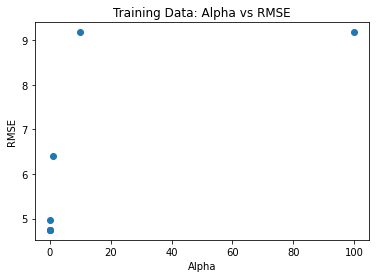



Alpha:  [0, 0.001, 0.01, 0.1, 1, 10, 100]
RMSE:  [4.746813770988767, 4.746838495430283, 4.749207682815122, 4.9767987510972365, 6.399668883840319, 9.174559171971152, 9.174559171971152]


Training Data, best lambda:  0
Training Data, corresponding training error:  4.746813770988767




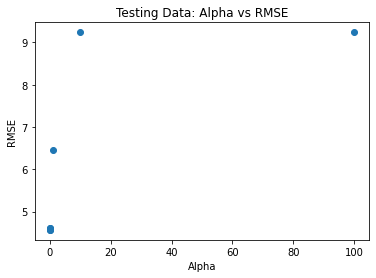



Alpha:  [0, 0.001, 0.01, 0.1, 1, 10, 100]
RMSE:  [4.6074659847355095, 4.60290845446462, 4.565346702514478, 4.571451839370644, 6.467171538522437, 9.241678655815646, 9.241678655815646]


Testing Data, best lambda:  0.01
Testing Data, corresponding training error:  4.565346702514478




In [108]:
import warnings
warnings.filterwarnings('ignore')

train_mses = []
test_mses = []

for alpha in alphas:

  alpha_val = alpha
  lasso_model = Lasso(alpha=alpha_val)
  lasso_model.fit(house_scale_X_train, house_scale_Y_train)
  lasso_model_Y_pred_train = lasso_model.predict(house_scale_X_train)
  lasso_model_Y_pred_test = lasso_model.predict(house_scale_X_test)
  
  train_mse = mean_squared_error(house_scale_Y_train,lasso_model_Y_pred_train, squared=False)
  test_mse = mean_squared_error(house_scale_Y_test,lasso_model_Y_pred_test, squared=False)

  train_mses.append(train_mse)
  test_mses.append(test_mse)

plt.scatter(alphas,train_mses)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Training Data: Alpha vs RMSE")
plt.show()

print("\n")

print("Alpha: ", alphas)
print("RMSE: ", train_mses)
print("\n")

min_rmse_index = train_mses.index(min(train_mses))
best_lambda = alphas[min_rmse_index]

print("Training Data, best lambda: ", best_lambda)
print("Training Data, corresponding training error: ", min(train_mses))

print("\n")

plt.scatter(alphas,test_mses)
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Testing Data: Alpha vs RMSE")
plt.show()

print("\n")

print("Alpha: ", alphas)
print("RMSE: ", test_mses)

print("\n")

min_rmse_index = test_mses.index(min(test_mses))
best_lambda = alphas[min_rmse_index]

print("Testing Data, best lambda: ", best_lambda)
print("Testing Data, corresponding training error: ", min(test_mses))

print("\n")

####Discussion for above output:
In training data, the results are identical to results obtained for ridge regression. The best lambda value is zero, which means that there is no need of penalizing. In other words the model that best overfits the training data will be the best.

In case of testing data, the best lambda value is 0.01, similar to one we obtained for ridge regression however, the corresponding rmse value is greater than the one obtained for ridge. We can say that lasso regression removes the features in the process which are useful for performing prediction.

# Q-3: Cross-validation: Use the selected 400 examples as training, follow the 5-fold cross-validation procedure to select the best value of alpha for both ridge regression and lasso. Then train the model on the 400 examples using the selected alpha and compute the root mean square error on the testing data. Report the best alpha and the testing error for both ridge regression and lasso.

### Ridge Regression

In [141]:
cross_validation = KFold(n_splits=5, random_state=10, shuffle=True)

n = 400

# extracting first 400 training examples
X = house_scale_X.head(n)
y = house_scale_y.head(n)

mean_rmses = []
for alpha in alphas:
  rmses = []    
  for train_index, test_index in cross_validation.split(X):
      # separating test data from training data based on return indices of training and testing sets
      x_train, x_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
      
      alpha_val = alpha * 2 * len(x_train)
      ridge_model = Ridge(alpha=alpha_val)
      ridge_model.fit(x_train, y_train)

      ridge_model_Y_pred_test = ridge_model.predict(x_test)

      test_mse = mean_squared_error(y_test,ridge_model_Y_pred_test, squared=False)
      
      rmses.append(test_mse)
  
  mean_rmses.append(np.mean(rmses))

min_rmse_index = mean_rmses.index(min(mean_rmses))
best_lambda_r_3 = alphas[min_rmse_index]
min_error_r_3 = min(mean_rmses)
print("Ridge Regression, best lambda: ", best_lambda_r_3)
print("Ridge Regression, corresponding testing error: ", min_error_r_3)


Ridge Regression, best lambda:  0.001
Ridge Regression, corresponding testing error:  4.8700892651864365


#### Lasso Regression

In [146]:
cross_validation = KFold(n_splits=5, random_state=10, shuffle=True)

n = 400

# extracting first 400 training examples
X = house_scale_X.head(n)
y = house_scale_y.head(n)

mean_rmses = []
for alpha in alphas:
  rmses = []    
  for train_index, test_index in cross_validation.split(X):
      # separating test data from training data based on return indices of training and testing sets
      x_train, x_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
      
      alpha_val = alpha
      lasso_model = Lasso(alpha=alpha_val)
      lasso_model.fit(x_train, y_train)

      lasso_model_Y_pred_test = ridge_model.predict(x_test)

      test_mse = mean_squared_error(y_test,lasso_model_Y_pred_test, squared=False)
      
      rmses.append(test_mse)
  
  mean_rmses.append(np.mean(rmses))

min_rmse_index = mean_rmses.index(min(mean_rmses))
best_lambda_l_3 = alphas[min_rmse_index]
min_error_l_3 = min(mean_rmses)
print("Lasso Regression, best lambda: ", best_lambda_l_3)
print("Lasso Regression, corresponding testing error: ", min_error_l_3)


Lasso Regression, best lambda:  0
Lasso Regression, corresponding testing error:  9.722380074606637


# Q-4: Repeat (Q-3) using the original version of the data and compare the results with that obtained for (Q-3).

Reading and preprocessing original data.

In [137]:
house_data = pd.read_csv('./sample_data/house.txt', sep=" ", header=None)
house_data.columns = ["target", "column-1", "column-2", "column-3", "column-4", 
                            "column-5", "column-6", "column-7", "column-8", "column-9", 
                            "column-10", "column-11", "column-12", "column-13"]
                            
# removing garbage from data values and converting the values to float
house_processed = pd.DataFrame()
house_processed["target"] = house_data["target"]
house_processed["column-1"] = house_data["column-1"].str.replace('1:', '').astype(float)
house_processed["column-2"] = house_data["column-2"].str.replace('2:', '').astype(float)
house_processed["column-3"] = house_data["column-3"].str.replace('3:', '').astype(float)
house_processed["column-4"] = house_data["column-4"].str.replace('4:', '').astype(float)
house_processed["column-5"] = house_data["column-5"].str.replace('5:', '').astype(float)
house_processed["column-6"] = house_data["column-6"].str.replace('6:', '').astype(float)
house_processed["column-7"] = house_data["column-7"].str.replace('7:', '').astype(float)
house_processed["column-8"] = house_data["column-8"].str.replace('8:', '').astype(float)
house_processed["column-9"] = house_data["column-9"].str.replace('9:', '').astype(float)
house_processed["column-10"] = house_data["column-10"].str.replace('10:', '').astype(float)
house_processed["column-11"] = house_data["column-11"].str.replace('11:', '').astype(float)
house_processed["column-12"] = house_data["column-12"].str.replace('12:', '').astype(float)
house_processed["column-13"] = house_data["column-13"].str.replace('13:', '').astype(float)

print(house_processed.head())


   target  column-1  column-2  ...  column-11  column-12  column-13
0    24.0   0.00632      18.0  ...       15.3     396.90       4.98
1    21.6   0.02731       0.0  ...       17.8     396.90       9.14
2    34.7   0.02729       0.0  ...       17.8     392.83       4.03
3    33.4   0.03237       0.0  ...       18.7     394.63       2.94
4    36.2   0.06905       0.0  ...       18.7     396.90       5.33

[5 rows x 14 columns]


Separating feature and target columns.

In [138]:
house_X, house_y = house_processed.iloc[:, 1:], house_processed.iloc[:, 0]

print("Feature vector: ")
print(house_X.head())
print("\nTaget vector: ")
print(house_y.head())

Feature vector: 
   column-1  column-2  column-3  ...  column-11  column-12  column-13
0   0.00632      18.0      2.31  ...       15.3     396.90       4.98
1   0.02731       0.0      7.07  ...       17.8     396.90       9.14
2   0.02729       0.0      7.07  ...       17.8     392.83       4.03
3   0.03237       0.0      2.18  ...       18.7     394.63       2.94
4   0.06905       0.0      2.18  ...       18.7     396.90       5.33

[5 rows x 13 columns]

Taget vector: 
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64


### Ridge Regression

In [143]:
cross_validation = KFold(n_splits=5, random_state=10, shuffle=True)

n = 400

# extracting first 400 training examples
X = house_X.head(n)
y = house_y.head(n)

mean_rmses = []
for alpha in alphas:
  rmses = []    
  for train_index, test_index in cross_validation.split(X):
      # separating test data from training data based on return indices of training and testing sets
      x_train, x_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
      
      alpha_val = alpha * 2 * len(x_train)
      ridge_model = Ridge(alpha=alpha_val)
      ridge_model.fit(x_train, y_train)

      ridge_model_Y_pred_test = ridge_model.predict(x_test)

      test_mse = mean_squared_error(y_test,ridge_model_Y_pred_test, squared=False)
      
      rmses.append(test_mse)
  
  mean_rmses.append(np.mean(rmses))

min_rmse_index = mean_rmses.index(min(mean_rmses))

best_lambda_r_4 = alphas[min_rmse_index]
min_error_r_4 = min(mean_rmses)

print("Ridge Regression, best lambda: ", best_lambda_r_4)
print("Ridge Regression, corresponding testing error: ", min_error_r_4)

Ridge Regression, best lambda:  0
Ridge Regression, corresponding testing error:  4.883826627394521


In [145]:
cross_validation = KFold(n_splits=5, random_state=10, shuffle=True)

n = 400

# extracting first 400 training examples
X = house_X.head(n)
y = house_y.head(n)

mean_rmses = []
for alpha in alphas:
  rmses = []    
  for train_index, test_index in cross_validation.split(X):
      # separating test data from training data based on return indices of training and testing sets
      x_train, x_test, y_train, y_test = X.iloc[train_index],X.iloc[test_index],y.iloc[train_index],y.iloc[test_index]
      
      alpha_val = alpha
      lasso_model = Lasso(alpha=alpha_val)
      lasso_model.fit(x_train, y_train)

      lasso_model_Y_pred_test = ridge_model.predict(x_test)

      test_mse = mean_squared_error(y_test,lasso_model_Y_pred_test, squared=False)
      
      rmses.append(test_mse)
  
  mean_rmses.append(np.mean(rmses))

min_rmse_index = mean_rmses.index(min(mean_rmses))
best_lambda_l_4 = alphas[min_rmse_index]
min_error_l_4 = min(mean_rmses)

print("Lasso Regression, best lambda: ", best_lambda_l_4)
print("Lasso Regression, corresponding testing error: ", min_error_l_4)


Lasso Regression, best lambda:  0
Lasso Regression, corresponding testing error:  7.86203213059908


### Comparison of Results obtained from Q-3 and Q-4

In [147]:
print("Ridge Regression with scaled data set, best lambda: ", best_lambda_r_3)
print("Ridge Regression with scaled data set, corresponding testing error: ", min_error_r_3)
print("\n")
print("Ridge Regression with original data set, best lambda: ", best_lambda_r_4)
print("Ridge Regression with original data set, corresponding testing error: ", min_error_r_4)
print("\n")
print("Lasso Regression with scaled data set, best lambda: ", best_lambda_l_3)
print("Ridge Regression with scaled data set, corresponding testing error: ", min_error_l_3)
print("\n")
print("Ridge Regression with original data set, best lambda: ", best_lambda_l_4)
print("Ridge Regression with original data set, corresponding testing error: ", min_error_l_4)


Ridge Regression with scaled data set, best lambda:  0.001
Ridge Regression with scaled data set, corresponding testing error:  4.8700892651864365


Ridge Regression with original data set, best lambda:  0
Ridge Regression with original data set, corresponding testing error:  4.883826627394521


Lasso Regression with scaled data set, best lambda:  0
Ridge Regression with scaled data set, corresponding testing error:  9.722380074606637


Ridge Regression with original data set, best lambda:  0
Ridge Regression with original data set, corresponding testing error:  7.86203213059908


Best lambda value for unscaled/original data for both ridge and lasso regression is 0, which is not surprising because when we remove scaling then these models gets affected by outliers in the dataset. Large values of all variables will not be penalized equally, features having higher values on average will be penalized more than other feature with same predictive importance but have smaller values on average.